In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib ipympl

In [149]:
f = 10
m_p = -2
z1 = f * ((1 / m_p) - 1)
z2 = f * (1 - m_p)

thickness = 0.0
lens_z = 0.0
N = 1

#Define Object Point
y1 = 4.0
x1 = 0.0

#Calculate Principal Planes
pp_1 = lens_z - thickness / 2
pp_2 = lens_z + thickness / 2

#And determine principal ray direction cosines, and 
#the object and image point. 
theta_1x = 0.0
theta_1y = np.arctan(y1 / z1)

M1_p = np.sin(theta_1y)
L1_p = np.sin(theta_1x)
N1_p = np.sqrt(1 - (L1_p ** 2) - (M1_p ** 2))

# For perfect imaging lens:
x2_hat = f * np.tan(theta_1x)
y2_hat = f * np.tan(theta_1y)

if np.abs(m_p) <= 1.0:
    x2 = z2 * (L1_p / N1_p)
    y2 = z2 * (M1_p / N1_p)
    
    rp = np.sqrt(x2 ** 2 + y2 **2 + z2 ** 2)
    
    L2_p = x2 / rp
    M2_p = y2 / rp
    N2_p = np.sqrt(1 - L2_p ** 2 - M2_p ** 2)
    
    theta_2x = np.arcsin(L2_p)
    theta_2y = np.arcsin(M2_p)
    
    x1_hat = f * np.tan(theta_2x)
    y1_hat = f * np.tan(theta_2y)
    
elif np.abs(m_p) > 1.0:
    
    a = x1 / z1
    b = y1 / z1
    
    N2_p = 1 / np.sqrt(1 + a ** 2 + b ** 2)
    
    L2_p = a * N2_p
    M2_p = b * N2_p
    
    x2 = (L2_p / N2_p) * z2
    y2 = (M2_p / N2_p) * z2
    
    x1_hat = (L2_p / N2_p) * f
    y1_hat = (M2_p / N2_p) * f
    

In [150]:
theta_ray_y = np.pi/2
theta_ray_x = np.pi/2

M1 = np.cos(theta_ray_y)
L1 = np.cos(theta_ray_x)
N1 = np.sqrt(1 - L1 **2 - M1 ** 2)

u1 = (L1 / N1) * z1 + x1
v1 = (M1 / N1) * z1 + y1

Cx = m_p * L2_p - L1_p
Cy = m_p * M2_p - M1_p

L2 = (L1 + Cx) / m_p
M2 = (M1 + Cy) / m_p
N2 = (1 - (L2 ** 2) - (M2 ** 2)) ** (1/2)

u2 = - (L2 / N2) * z2 + x2
v2 = - (M2 / N2) * z2 + y2

(-17.25, 32.25, -8.628587266192621, 5.200332590045028)

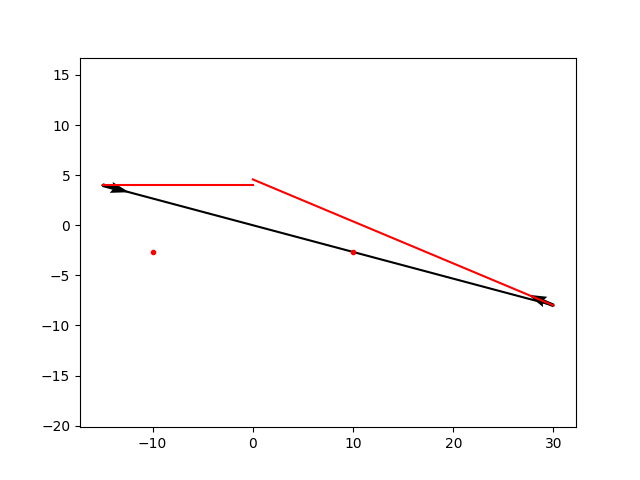

In [151]:
plt.figure()
# plt.vlines(0, 0, 5, color = 'k', linestyle = '--')
plt.plot([z1, z2], [y1, y2], '-k')
plt.plot([z1, pp_1], [y1, v1], '-r')
plt.plot([pp_2, z2], [v2, y2], '-r')
plt.plot(-f, y1_hat, '.r')
plt.plot(f, y2_hat, '.r')
plt.quiver(z1, y1, N1_p, M1_p)
# plt.quiver(z2, y2, -N2_p, -M2_p)
plt.quiver(z2, y2, -N2, -M2)
plt.axis('equal')



In [118]:

f = 10
N = 2
x0 = 4.0
do = -4
lens_z = 0.0
lens_f = 2.0
di = -1/((1/-lens_f) - (1/do))
M = di / do
chief_opl = np.abs(do) + di

rays_start_x = np.linspace(x0, x0, N)
rays_start_z = np.linspace(do, do, N)
rays_slope = np.linspace(0.0, 1.0, N)
rays_angle = np.arctan(rays_slope)
d = np.cos(rays_angle) * rays_start_x 

dz = d * np.cos(rays_angle)
dx = d * np.sin(rays_angle)
dopl = np.sqrt(dz ** 2 + dx ** 2)

rays_start = np.array([rays_start_x, rays_slope])
rays_start_opl = np.zeros(N) + dopl
rays_start_opl[0] += 0

lens_mat = lambda f: np.array([[1, 0], [-1 / f, 1]])
prop_mat = lambda d: np.array([[1, d], [0, 1]])

rays_lens_z = rays_start_z + (lens_z - rays_start_z)
rays_focal_z = rays_lens_z + (lens_f)
rays_image_z = rays_focal_z + (di - lens_f)

rays_lens = np.matmul(prop_mat(lens_z - rays_start_z[0]), rays_start)
rays_lens = np.matmul(lens_mat(lens_f), rays_lens)
new_ray_angle = np.arctan(rays_lens[1, :])
rays_focal = np.matmul(prop_mat(lens_f), rays_lens)
rays_image = np.matmul(prop_mat(di - lens_f), rays_focal)

rays_start_lens_opl_left = rays_start_opl + np.sqrt((lens_z - rays_start_z) ** 2 + (rays_lens[0, :] - rays_start_x) ** 2)

focal_point_x = lens_f * rays_slope

opl_chief = np.sqrt(lens_f ** 2 + focal_point_x **2)

interface_distance_left = rays_lens[0, :] * np.sin(rays_angle)
interface_distance_right = rays_lens[0, :] * np.sin(new_ray_angle)

# rays_lens_opl_right = rays_start_lens_opl_left - rays_lens[0, :] * np.sin(rays_angle) -  #(rays_start_lens_opl_left - rays_lens[0, :] * np.sin(rays_angle)) - np.sqrt(lens_f ** 2 + (rays_lens[0, :] - focal_point_x) ** 2)
# h =  np.abs(rays_lens[0, :]) * np.sin(new_ray_angle)
# rays_lens_focal_opl = rays_lens_opl_right #rays_lens_opl_right + np.sqrt(lens_f ** 2 + (rays_lens[0, :] - focal_point_x) ** 2)
# # rays_lens_image_opl = #rays_lens_focal_opl + np.sqrt((di - lens_f) ** 2 + (rays_focal[0, :] - rays_image[0, :]) **2) 

# opl_values =  np.ones(N) * 5.6568 #(rays_start_lens_opl_left - rays_lens[0, :] * np.sin(rays_angle))
# z01_given_opl, x01_given_z = interp_coordinates_from_optical_path_length(rays_start_opl, rays_start_lens_opl_left, 
#                                                                         rays_start_z, rays_lens_z,
#                                                                         rays_start[0, :], rays_lens[0, :],
#                                                                         opl_values)

# opl_value = np.ones(N) * rays_lens_opl_right
# z12_given_opl, x12_given_z = interp_coordinates_from_optical_path_length(rays_lens_opl_right, rays_lens_focal_opl, 
#                                                                         rays_lens_z, rays_focal_z,
#                                                                         rays_lens[0, :], rays_focal[0, :],
#                                                                         opl_values)
# opl_value = 5
# z13_given_opl, x13_given_z = interp_coordinates_from_optical_path_length(rays_lens_focal_opl, rays_lens_image_opl, 
#                                                                         rays_focal_z, rays_image_z,
#                                                                         rays_focal[0, :], rays_image[0, :],
#                                                                         opl_values)

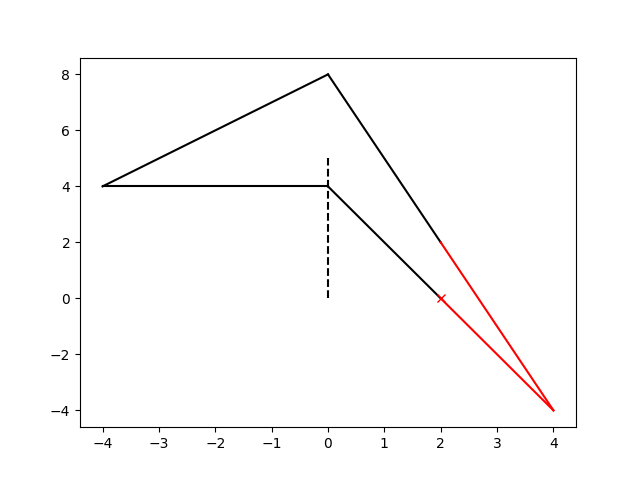

In [119]:
plt.figure()
plt.vlines(0, 0, 5, color = 'k', linestyle = '--')
plt.plot([rays_start_z, rays_lens_z], [rays_start[0, :], rays_lens[0, :]], '-k')
plt.plot([rays_lens_z, rays_focal_z], [rays_lens[0, :], rays_focal[0, :]], '-k')
plt.plot([rays_focal_z, rays_image_z], [rays_focal[0, :], rays_image[0, :]], '-r')
# plt.plot(z01_given_opl, x01_given_z, '.b')
# plt.plot(z12_given_opl, x12_given_z, '.b')
# plt.plot(z13_given_opl, x13_given_z, '.b')
# dist = np.sqrt((z12_given_opl - lens_f) ** 2 + (x12_given_z - focal_point_x) ** 2)
# print(dist)
x = lens_f * rays_slope


plt.plot(lens_f, x[0], 'xr')
# plt.axis('equal')

Convert Spherical Wave from Point object to Spherical Wave for Point Image. 

In [120]:
f = 10
N = 10
x0 = 4.0
do = -4
lens_z = 0.0
lens_f = 2.0
di = -1/((1/-lens_f) - (1/do))
M = di / do
chief_opl = np.abs(do) + di

rays_start_x = np.linspace(0.0, 0.0, N)
rays_start_z = np.linspace(do, do, N)
rays_slope = np.linspace(0.0, 1, N)
rays_angle = np.arctan(rays_slope)
d = np.cos(rays_angle) * rays_start_x 

dz = d * np.cos(rays_angle)
dx = d * np.sin(rays_angle)
dopl = np.sqrt(dz ** 2 + dx ** 2)

rays_start = np.array([rays_start_x, rays_slope])
rays_start_opl = np.zeros(N) + dopl
lens_mat = lambda f: np.array([[1, 0], [-1 / f, 1]])
prop_mat = lambda d: np.array([[1, d], [0, 1]])

rays_lens_z = rays_start_z + (lens_z - rays_start_z)
rays_focal_z = rays_lens_z + (lens_f)
rays_image_z = rays_focal_z + (di - lens_f)

rays_lens = np.matmul(prop_mat(lens_z - rays_start_z[0]), rays_start)
rays_lens = np.matmul(lens_mat(lens_f), rays_lens)
rays_focal = np.matmul(prop_mat(lens_f), rays_lens)
rays_image = np.matmul(prop_mat(di - lens_f), rays_focal)

rays_start_lens_opl_left = rays_start_opl + np.sqrt((lens_z - rays_start_z) ** 2 + (rays_lens[0, :] - rays_start_x) ** 2)

focal_point_x = lens_f * rays_slope

opl_chief = np.sqrt(lens_f ** 2 + focal_point_x **2)

prop_dist_lens_to_focal_plane = np.sqrt(lens_f ** 2 + (rays_lens[0, :] - focal_point_x) ** 2)
rays_lens_opl_right = (rays_start_lens_opl_left - rays_lens[0, :] * np.sin(rays_angle)) - prop_dist_lens_to_focal_plane

new_ray_angle = np.arctan(rays_lens[1, :])
rays_lens_focal_opl = rays_lens_opl_right + prop_dist_lens_to_focal_plane
rays_lens_image_opl = rays_lens_focal_opl + np.sqrt((di - lens_f) ** 2 + (rays_focal[0, :] - rays_image[0, :]) **2) 
opl_oe = 4.0
 
opl_value = 4
z01_given_opl, x01_given_z = interp_coordinates_from_optical_path_length(rays_start_opl, rays_start_lens_opl_left, 
                                                                        rays_start_z, rays_lens_z,
                                                                        rays_start[0, :], rays_lens[0, :],
                                                                        opl_value)

opl_value = 2
z12_given_opl, x12_given_z = interp_coordinates_from_optical_path_length(rays_lens_opl_right, rays_lens_focal_opl, 
                                                                        rays_lens_z, rays_focal_z,
                                                                        rays_lens[0, :], rays_focal[0, :],
                                                                        opl_value)
opl_value = 5
z13_given_opl, x13_given_z = interp_coordinates_from_optical_path_length(rays_lens_focal_opl, rays_lens_image_opl, 
                                                                        rays_focal_z, rays_image_z,
                                                                        rays_focal[0, :], rays_image[0, :],
                                                                        opl_value)

NameError: name 'opl_values' is not defined

(-4.4, 4.4, -0.25, 5.25)

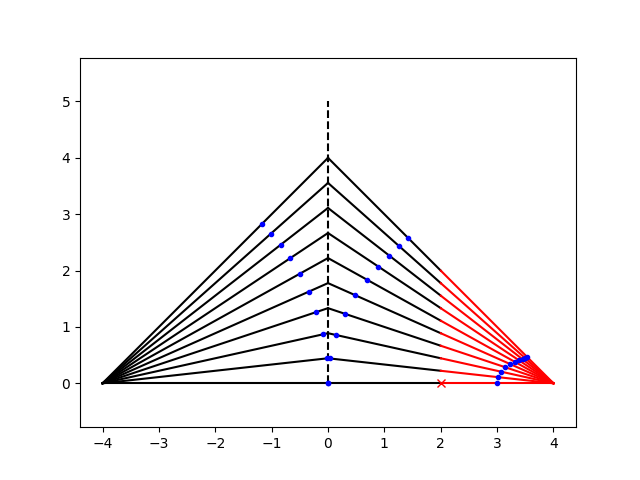

In [ ]:
plt.figure()
plt.vlines(0, 0, 5, color = 'k', linestyle = '--')
plt.plot([rays_start_z, rays_lens_z], [rays_start[0, :], rays_lens[0, :]], '-k')
plt.plot([rays_lens_z, rays_focal_z], [rays_lens[0, :], rays_focal[0, :]], '-k')
plt.plot([rays_focal_z, rays_image_z], [rays_focal[0, :], rays_image[0, :]], '-r')
plt.plot(z01_given_opl, x01_given_z, '.b')
plt.plot(z12_given_opl, x12_given_z, '.b')
plt.plot(z13_given_opl, x13_given_z, '.b')

x = lens_f * rays_slope

plt.plot(lens_f, x[0], 'xr')
plt.axis('equal')